This notebook demonstrates how to do Meanshift to do image segmentation on an image using the [Scikit-Learn](http://scikit-learn.org/stable/) library.

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 12

We will load in the image and display the original image for reference.

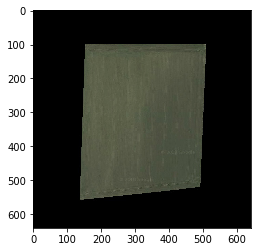

In [202]:
image = Image.open('../example_output/extract_field1095.jpg')

# Image is (687 x 1025, RGB channels)
image = np.array(image)
# image = cv2.pyrMeanShiftFiltering(image, 30, 75)
original_shape = image.shape

# # Flatten image.
X = np.reshape(image, [-1, 3])

# thresh = 100
# X[(X < thresh).all(axis=1)] = 0

# segmented_image = np.reshape(X, image.shape)  # Just take size, ignore RGB channels.


plt.imshow(image)

Filtering the image

In [203]:
# flatten all pixels values under 25
thresh = 25
X[(X < thresh).all(axis=1)] = 0


# filtering: remove black colors
Xnew = X[np.any(X, axis=1)]
# print(X.shape)

filterdPixelsCount = X.shape[0] - Xnew.shape[0]
print(X.shape)
print(Xnew.shape)
print(filterdPixelsCount)
# X = Xnew

(409600, 3)
(155521, 3)
254079


Estimate the kernel bandwidth to use from our image (the datapoints).

In [209]:
bandwidth = estimate_bandwidth(X, quantile=0.25, n_samples=400)
print(bandwidth)

6.0536240218190835


Now run Meanshift on the image to do the image segmentation, which is stored in *X*.

In [210]:
%%time
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, min_bin_freq= 0.1 * Xnew.shape[0], n_jobs=-1)
ms.fit(X)

Wall time: 7min 51s


Print some debug information to get a sense of what is being done. From what we see, this yielded 6 clusters, thus 6 colors. If you re-run this notebook with different parameters, you may find different results.

In [211]:
labels = ms.labels_
print(labels.shape)
cluster_centers = ms.cluster_centers_
print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

(409600,)
(3, 3)
number of estimated clusters : 3


In [212]:
segmented_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

Now, let's display the segmented image and the original image.

(-0.5, 639.5, 639.5, -0.5)

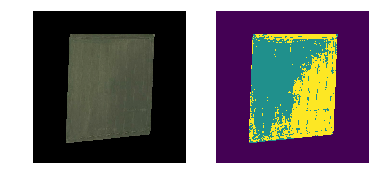

In [213]:
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis('off')

In [215]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

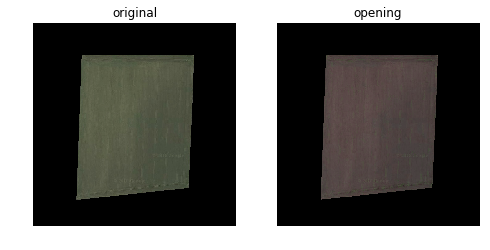

In [219]:
from skimage.morphology import opening, erosion
from skimage.util import img_as_ubyte
opened = erosion(image)
plot_comparison(image, opened, 'opening')